# Information Retrieval

TF-IDF Matrix:
[[0.         0.49552379 0.         0.         0.         0.
  0.         0.         0.         0.61418897 0.         0.
  0.         0.61418897 0.        ]
 [0.52335825 0.         0.         0.         0.         0.42224214
  0.52335825 0.         0.52335825 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.52335825 0.         0.         0.42224214
  0.         0.         0.         0.         0.         0.52335825
  0.52335825 0.         0.        ]
 [0.         0.49552379 0.         0.         0.         0.
  0.         0.61418897 0.         0.         0.61418897 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.57735027]]


LSA-transformed Matrix:
[[ 7.89158991e-01 -1.93688350e-16]
 [ 1.63292918e-16  7.67557303e-01]
 [ 7.83403758e-16  7.67557303e-01]
 [ 7.89158991e-01 -7.79529165e-16]
 [ 3.25806955e

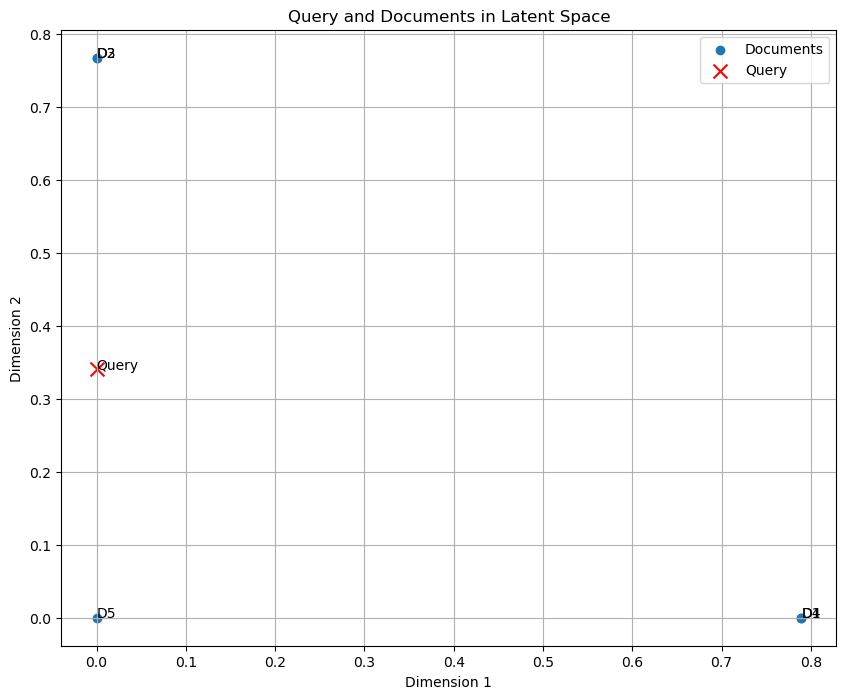

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def vectorize_texts(corpus):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(corpus)
    return tfidf_matrix, vectorizer

def apply_lsa(matrix, n_components=2):
    svd = TruncatedSVD(n_components=n_components)
    lsa_matrix = svd.fit_transform(matrix)
    return lsa_matrix, svd

def retrieve_documents(query, documents, vectorizer, svd, top_n=5):
    query_vec = vectorizer.transform([query])
    query_lsa = svd.transform(query_vec)

    docs_tfidf = vectorizer.transform(documents)
    docs_lsa = svd.transform(docs_tfidf)

    similarities = cosine_similarity(query_lsa, docs_lsa).flatten()
    most_similar_indices = similarities.argsort()[-top_n:][::-1]

    relevant_docs = [documents[i] for i in most_similar_indices]
    return relevant_docs, query_lsa, docs_lsa, similarities

def plot_embeddings(query_embedding, doc_embeddings, documents, query):
    plt.figure(figsize=(10, 8))
    plt.scatter(doc_embeddings[:, 0], doc_embeddings[:, 1], label='Documents', marker='o')
    plt.scatter(query_embedding[:, 0], query_embedding[:, 1], label='Query', marker='x', color='red', s=100)

    for i, doc in enumerate(documents):
        plt.annotate(f"D{i+1}", (doc_embeddings[i, 0], doc_embeddings[i, 1]))

    plt.annotate("Query", (query_embedding[:, 0], query_embedding[:, 1]))
    plt.title("Query and Documents in Latent Space")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
documents = [
    "The cat sits on the mat.",
    "Dogs are a man's best friend.",
    "Cats and dogs are popular pets.",
    "I love my pet cat.",
    "The dog chased its tail."
]

query = "I am looking for information about cats."

# Vectorize the documents
tfidf_matrix, vectorizer = vectorize_texts(documents)

# Print the TF-IDF matrix
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())
print("\n")

# Apply LSA to the TF-IDF matrix
lsa_matrix, svd = apply_lsa(tfidf_matrix, n_components=2)

# Print the LSA-transformed matrix
print("LSA-transformed Matrix:")
print(lsa_matrix)
print("\n")

# Retrieve relevant documents for the query
relevant_docs, query_lsa, docs_lsa, similarities = retrieve_documents(query, documents, vectorizer, svd, top_n=3)

# Print the cosine similarity scores
print("Cosine Similarity Scores:")
print(similarities)
print("\n")

# Display the relevant documents
print("Relevant Documents:")
for i, doc in enumerate(relevant_docs, 1):
    print(f"{i}. {doc}")

# Plot the embeddings
plot_embeddings(query_lsa, docs_lsa, documents, query)
